In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

import os
import numpy as np
from numpy import array as array
import numpy as np, scipy.stats as st
import h5py
import matplotlib.gridspec as gridspec
import math  
import csv
import statsmodels.formula.api as smf
import pandas as pd
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# used to get files in google drive
# from google.colab import drive
# from google.colab import files

In [12]:
# plt version 3.2.2 to use the function for rescaling
# !pip3 install matplotlib==3.2.2
# import matplotlib
# print('matplotlib: {}'.format(matplotlib.__version__))


# Plot the sample sizes histogram

In [7]:
# all the sound files, get label data
labelDir = "./"
labelFiles = ["SA_10Sep2020.txt", "Table_13AB_10Sep2020.txt", "Table_control_10Sep2020.txt"]

times = [] 
freqs = []
files = []
sonotypes = []
groups = []
selection = []

for labelFile in labelFiles:
  print()
  labelFilePath = labelDir + labelFile
  with open(labelFilePath) as file:
    label_reader = csv.reader(file, delimiter='\t')
    for row in label_reader:
      # not use the first row
      if (not row[0].isnumeric()):
        continue
      
      # get file name
      if labelFile == "SA_10Sep2020.txt":
        fileName = "Spatial analysis/" + row[7].split("Audios_SA\\")[-1].replace("\\","/")
      elif labelFile == "Table_13AB_10Sep2020.txt":
        fileName = "13AB/" + row[7].split("\\")[-1]
        # 3B_20180607_070500_Dawn_Sunrise_Based.wav
        # or 20180908_060000_13A_24H [1.4452 116.9811].wav
      elif labelFile == "Table_control_10Sep2020.txt":
        fileName = "Control sites/" + row[7].split("\\")[-1]
        
      splName = row[7].split("\\")[-1].split("_")

      try:
        sonotypes.append(int(row[11]))
        freqs.append([float(row[5]), float(row[6])])
        files.append(fileName) 
        groups.append(row[12])
        selection.append(int(row[0]))
      except:
        # selection number
        print(filename)
        print(row[0])
        pass

print("dataset size:  %i" % len(times))    
print("filename sample: " + files[0])

# print(len(files))
print(actTimes[len(files)-1])
print(times[len(files)-1])




dataset size:  3783
filename sample: Spatial analysis/4B/20180607_6h_day_weekly/20180607_060500_Dawn_Sunrise__4B___.wav
[26616.9212, 26621.323112212023]
[1176.9212000000007, 1181.3231122120233]


In [8]:
# print(sonotypes) samples for animals
len(np.argwhere(np.array(sonotypes) > 0).flatten())

3629

In [9]:
# get frequency
s_unique, s_freq = np.unique(np.array(sonotypes)[np.argwhere(np.array(sonotypes) > 0).flatten()],return_counts=True)
s_freq_order = np.argsort(s_freq)[::-1]
s_freq_desc = s_freq[s_freq_order]
s_unique_desc = s_unique[s_freq_order]

# grouop and sonotype dictionary
group_dic = dict(zip(sonotypes, groups))
group_desc = [group_dic[x] for x in s_unique_desc]
# print(np.unique(group_desc, return_counts=True))
# print(group_desc)
group_color = {'-':'red', 'a': 'blue', 'b': 'green', 'i': 'orange', 'm': 'purple', 'u': 'brown'}

# exclude "-" and "u"
s_freq_desc = s_freq_desc[np.argwhere( (np.array(group_desc) != '-') & (np.array(group_desc) != 'u') ).flatten()]


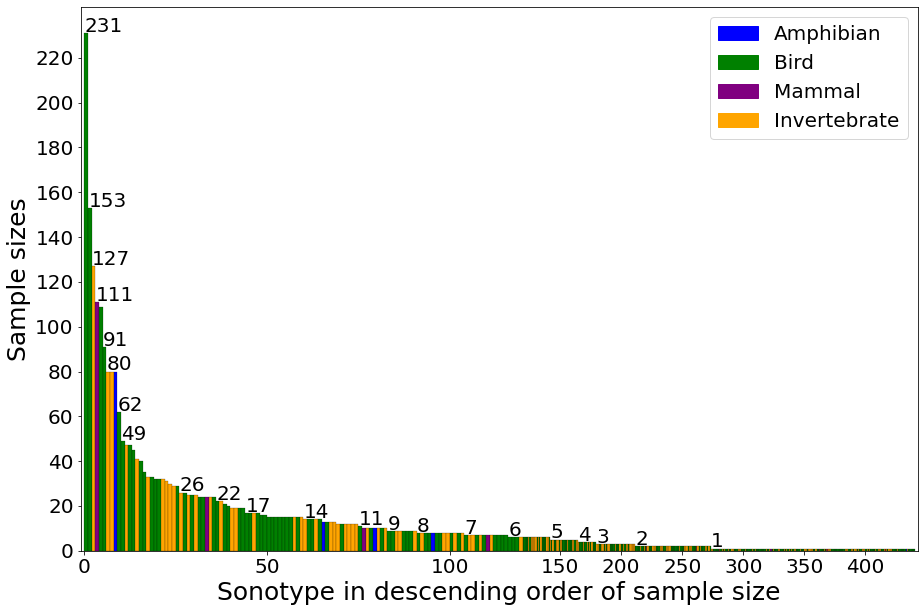

In [41]:
# histogram
# get the data for top k sonotypes
labelsize = 25

plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20})
# plt.xlim((-0.5, 50.5))
plt.xlim((-1, len(s_freq_desc)+ 1))   

arr=plt.hist(np.repeat(np.arange(len(s_freq_desc)), s_freq_desc), bins = len(s_freq_desc),edgecolor = "black", linewidth=0.2)

plt.ylabel("Sample sizes", fontsize = labelsize)
plt.xlabel("Sonotype in descending order of sample size", fontsize = labelsize)

# rescale x
start_dense = 120
dense_multiplier = 3
def forward(values):
  return np.array([x if x < start_dense else start_dense + 1/dense_multiplier * (x-start_dense) for x in values])
def reverse(values):
  return np.array([x if x < start_dense else (x-start_dense) * dense_multiplier + start_dense for x in values])

plt.xscale('function',functions=[forward, reverse])

# ticks
plt.xticks(np.arange(0, len(s_freq_desc), 50))
plt.yticks(np.arange(0, max(s_freq_desc), 20))

for i in range(len(s_freq_desc)): # index on x axis
  if i==0 or arr[0][i] < arr[0][i-1] -10 or (i > 50 and arr[0][i] < arr[0][i-1] and arr[0][i] not in [10,12,13]) or (i > 20 and i <= 50 and arr[0][i] < arr[0][i-1] - 1):
    plt.text(arr[1][i] + 0.1,arr[0][i] + 0.5,int(arr[0][i]))
  # set color
  arr[2][i].set_facecolor(group_color[group_desc[i]])

# legend
a_patch = mpatches.Patch(color=group_color['a'], label='Amphibian')
b_patch = mpatches.Patch(color=group_color['b'], label='Bird')
m_patch = mpatches.Patch(color=group_color['m'], label='Mammal')
i_patch = mpatches.Patch(color=group_color['i'], label='Invertebrate')
plt.legend(handles=[a_patch,b_patch,m_patch, i_patch])

strFile = "histogram_type1.png"
if os.path.isfile(strFile):
   os.remove(strFile) 
plt.savefig(strFile,bbox_inches='tight')


# Box plots 
aug - no aug, 2-6 sonotypes

In [2]:
box_width = 0.75
median_line_width = 3
box_line_width = 2

In [129]:
# augmented
filePath = "experiment_aug_0223.csv"

with open(filePath) as f:
    contents = f.read()

# no_aug = False
# cur_classes_num = 0

aug_accuracy = {}
# no_aug_accuracy = {}

splited_lists = contents.split("\n\n")
for splited_list in splited_lists:
  if not splited_list.strip():
    continue
  # comment line start with //
  if "//" in splited_list:
    cur_class_num, numbers = int(splited_list.split("\n")[0][-1]), splited_list.split("\n")[1].split(",")
    numbers = [float(x) for x in numbers if x]

    if cur_class_num in aug_accuracy:
        aug_accuracy[cur_class_num] = list(np.append( aug_accuracy[cur_class_num], numbers))
    else:
      aug_accuracy[cur_class_num] = numbers

  else:
    splited_list = splited_list.split("\n")
    for cur_list in splited_list:
      cur_list = cur_list.split(",")
      cur_class_num = len(cur_list[0].split(";"))
      numbers = [float(cur_list[-1].replace(";",""))]

      if cur_class_num in aug_accuracy:
        aug_accuracy[cur_class_num] = list(np.append( aug_accuracy[cur_class_num], numbers))
      else:
        aug_accuracy[cur_class_num] = numbers

# print(aug_accuracy)
# print(aug_accuracy[2])

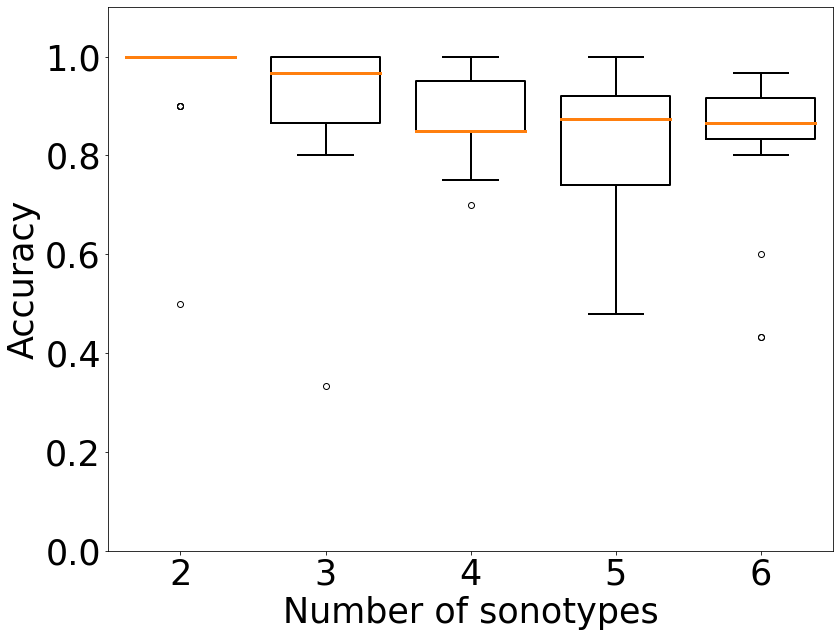

In [160]:
plt.figure(figsize=(13,10))
plt.rcParams.update({'font.size': 35})
fig.patch.set_facecolor('white')

# plt.title('Classification Accuracy On Birds with 49 Samples Per Classes With Augmentation')
plt.xlabel('Number of sonotypes', fontsize =35)
plt.ylabel('Accuracy', fontsize =35 )

labels,data = [],[]
for i in range(2,7):
  labels.append(i)
  data.append(aug_accuracy[i])
# labels, data = [*zip(*aug_accuracy.items())] 
# print(labels,data) 
# plt.boxplot(data,meanline = True, showmeans=True, medianprops=dict(linewidth=0),
#             meanprops= dict(linestyle='-.', linewidth=2.5, color='firebrick'))
plot = plt.boxplot(data,  widths=box_width)
for median in plot['medians']:
    median.set(linewidth=median_line_width)
# for flier in plot['fliers']:
#     flier.set(marker='+', color='#e7298a')
for whisker in plot['whiskers']:
    whisker.set(linewidth=box_line_width)
for cap in plot['caps']:
    cap.set(linewidth=box_line_width)
for box in plot['boxes']:
    box.set(linewidth=box_line_width)

plt.xticks(range(1, len(labels) + 1), labels)
plt.ylim([0,1.1])

# plt.show()

# strFile = "augmentation_acc.png"
# if os.path.isfile(strFile):
#    os.remove(strFile) 
# plt.savefig(strFile,bbox_inches='tight')

In [131]:
# not augmented, the same as above, parameter names not changes, just the different file path
filePath = "experiment_no.csv"

with open(filePath) as f:
    contents = f.read()

# no_aug = False
# cur_classes_num = 0

# aug_accuracy = {}
no_aug_accuracy = {}

splited_lists = contents.split("\n\n")
for splited_list in splited_lists:
  if not splited_list.strip():
    continue
  # comment line start with //
  if "//" in splited_list:
    cur_class_num, numbers = int(splited_list.split("\n")[0].strip()[-1]), splited_list.split("\n")[1].split(",")
    numbers = [float(x) for x in numbers if x]

    if cur_class_num in no_aug_accuracy:
        no_aug_accuracy[cur_class_num] = list(np.append( no_aug_accuracy[cur_class_num], numbers))
    else:
      no_aug_accuracy[cur_class_num] = numbers

  else:
    splited_list = splited_list.split("\n")
    for cur_list in splited_list:
      # print(cur_list)
      cur_list = cur_list.split(",")
      cur_class_num = len(cur_list[0].split(";"))
      numbers = [float(cur_list[-1].replace(";",""))]

      if cur_class_num in no_aug_accuracy:
        no_aug_accuracy[cur_class_num] = list(np.append( no_aug_accuracy[cur_class_num], numbers))
      else:
        no_aug_accuracy[cur_class_num] = numbers

# print(no_aug_accuracy)
# print(aug_accuracy)

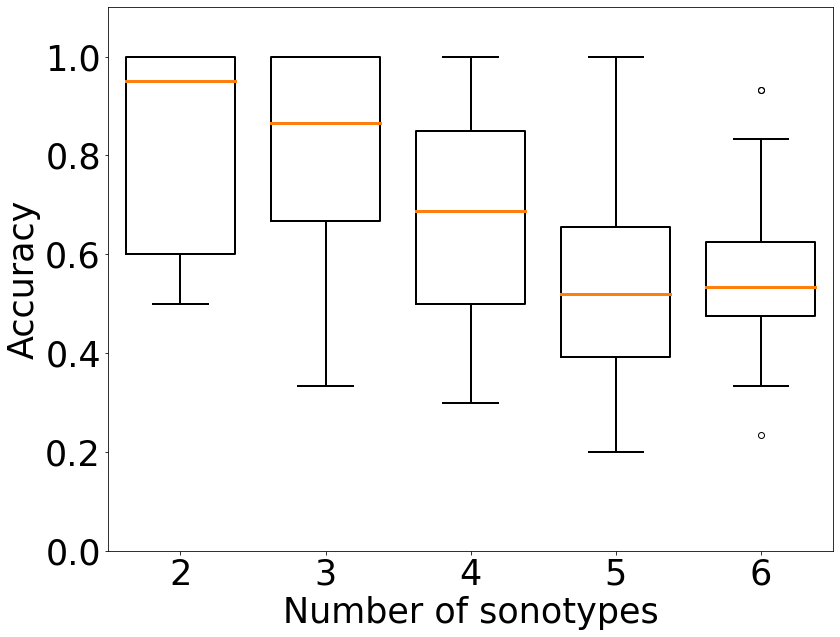

In [162]:
plt.figure(figsize=(13,10))
plt.rcParams.update({'font.size': 35})
fig.patch.set_facecolor('white')

# plt.title('Classification Accuracy On Birds with 49 Samples Per Classes With Augmentation')
plt.xlabel('Number of sonotypes', fontsize =35)
plt.ylabel('Accuracy', fontsize =35 )

labels,data = [],[]
for i in range(2,7):
  labels.append(i)
  data.append(aug_accuracy[i])
# labels, data = [*zip(*aug_accuracy.items())] 
# print(labels,data) 
plot = plt.boxplot(data, widths=box_width)
for median in plot['medians']:
    median.set(linewidth=median_line_width)
# for flier in plot['fliers']:
#     flier.set(marker='+', color='#e7298a')
for whisker in plot['whiskers']:
    whisker.set(linewidth=box_line_width)
for cap in plot['caps']:
    cap.set(linewidth=box_line_width)
for box in plot['boxes']:
    box.set(linewidth=box_line_width)

plt.xticks(range(1, len(labels) + 1), labels)
plt.ylim([0,1.1])

# plt.show()

# strFile = "non_augmentation_acc.png"
# if os.path.isfile(strFile):
#    os.remove(strFile) 
# plt.savefig(strFile,bbox_inches='tight')

## Plot together

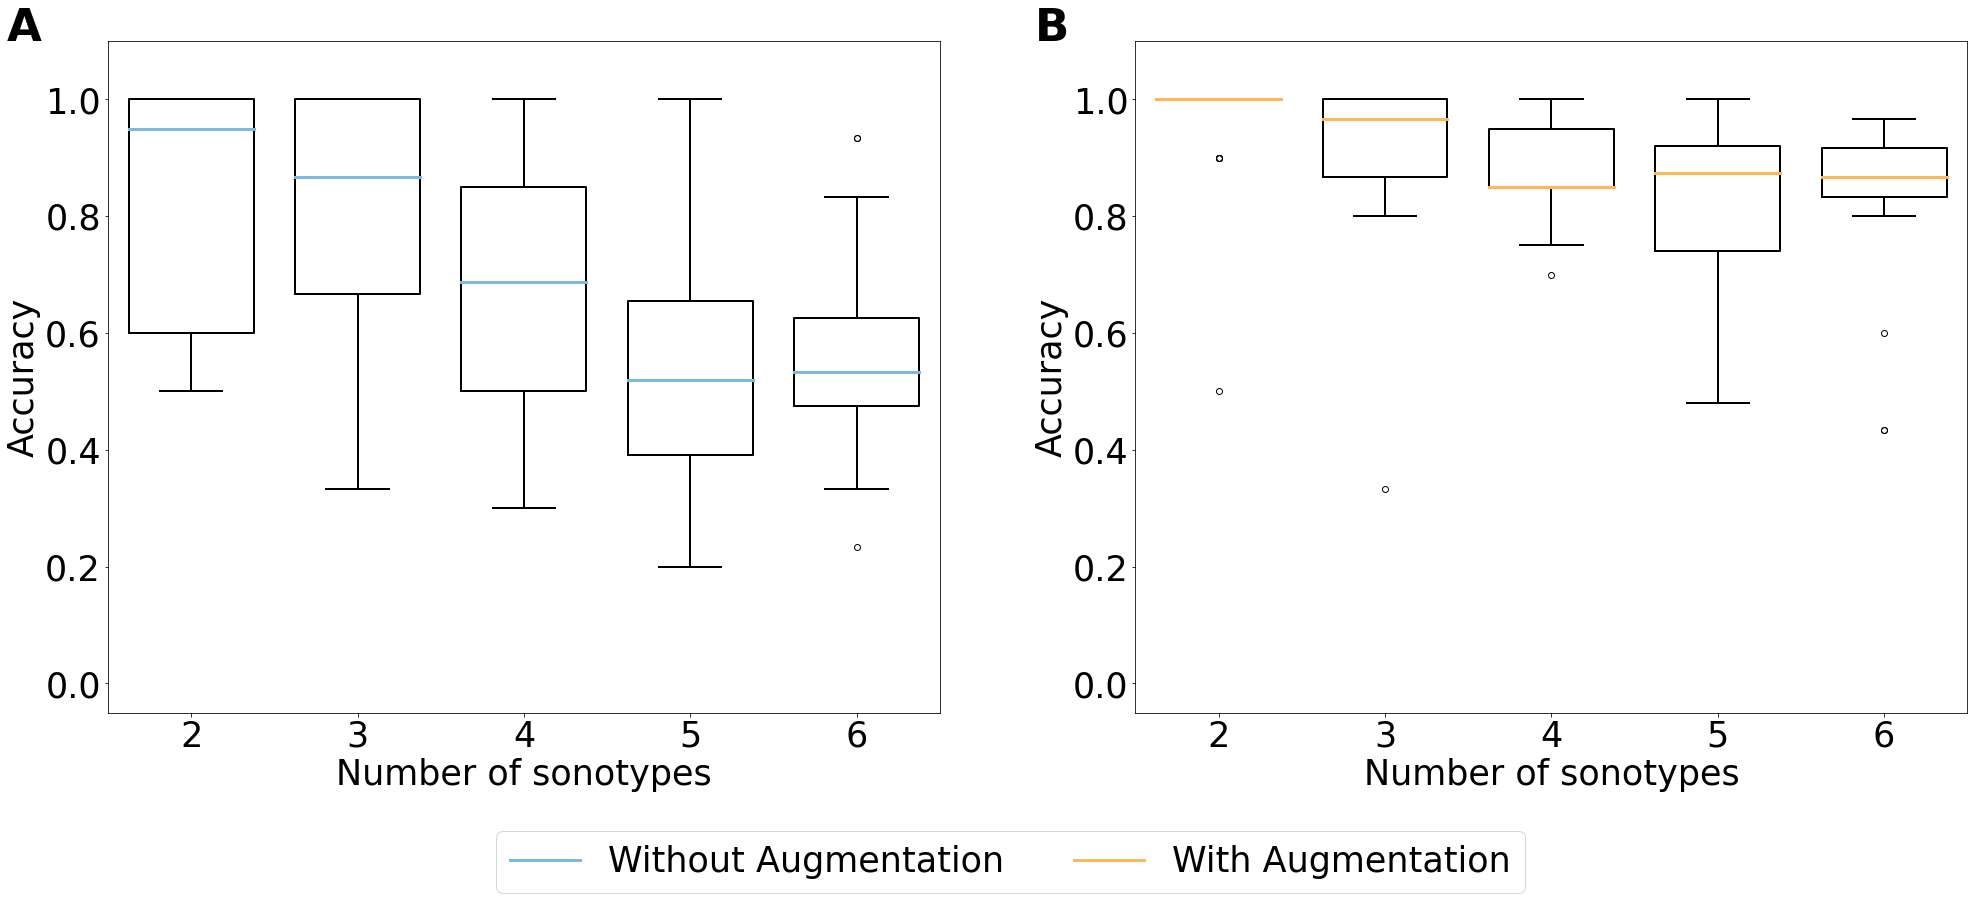

In [11]:
# AB labels on the right
# global
# fig, axs = plt.subplots(2, 2, figsize=(35,20))

box_width = 0.75
median_line_width = 3
box_line_width = 2
label_size = 35
# colors, as above
color_no = "#7DB9DE"
color_aug = "#fbb957"

labels = ["Invertebrates","Birds","Amphibians","Mammals"]

# fig = plt.figure(figsize=(35, 20), constrained_layout=True)
fig = plt.figure(figsize=(30, 13))
fig.patch.set_facecolor('white')
plt.rcParams.update({'font.size': label_size})

gs = fig.add_gridspec(1, 2)
axs = [fig.add_subplot(gs[i]) for i in range(2)]

fig.canvas.draw()
fig.tight_layout(pad=3.0)

# left not augmented
labels,data = [],[]
for i in range(2,7):
  labels.append(i)
  data.append(no_aug_accuracy[i])
plot = axs[0].boxplot(data, widths=box_width)
# plot['medians'][0].set(linewidth=median_line_width,color = color_no,label = "Without Augmentation")
for median in plot['medians']:
    # add label
    median.set(linewidth=median_line_width,color = color_no)
# for flier in plot['fliers']:
#     flier.set(marker='+', color='#e7298a')
for whisker in plot['whiskers']:
    whisker.set(linewidth=box_line_width)
for cap in plot['caps']:
    cap.set(linewidth=box_line_width)
for box in plot['boxes']:
    box.set(linewidth=box_line_width)

# right augmented
data = []
for i in range(2,7):
  data.append(aug_accuracy[i])
plot = axs[1].boxplot(data, widths=box_width)
# plot['medians'][0].set(linewidth=median_line_width,color = color_aug,label = "With Augmentation")
for median in plot['medians']:
    # add label
    median.set(linewidth=median_line_width,color = color_aug)
# for flier in plot['fliers']:
#     flier.set(marker='+', color='#e7298a')
for whisker in plot['whiskers']:
    whisker.set(linewidth=box_line_width)
for cap in plot['caps']:
    cap.set(linewidth=box_line_width)
for box in plot['boxes']:
    box.set(linewidth=box_line_width)

for ax in axs:
    # axis label and ticks
    ax.set_xlabel('Number of sonotypes', fontsize =label_size )
    ax.set_ylabel('Accuracy', fontsize =label_size )
    ax.set_xticklabels(labels,fontsize = label_size)
    ax.set_ylim([-0.05,1.1])
# plt.setp(axes, xticks=[y + 1 for y in range(len(all_data))],
#          xticklabels=labels)

# label
axlabels = [fig.text(0,0, label, fontsize=label_size + 10, fontweight="bold")
            for ax, label in zip(axs, ["A","B"])]
trans = fig.transFigure.inverted()
for ax, label in zip(axs, axlabels):
    bbox = ax.get_tightbbox(fig.canvas.get_renderer())
    label.set_position(trans.transform_point([bbox.x0, bbox.y1]))

# legend
# aug_patch = patches.Patch(color=color_aug, label='With Augmentation')
# no_patch = patches.Patch(color=color_no, label='Without Augmentation')
# handles=[no_patch,aug_patch]

lg_lines = [Line2D([0], [0], color=c, linewidth=3) for c in [color_no, color_aug]]
lg_labels = ['Without Augmentation', 'With Augmentation']

lgnd = plt.legend(lg_lines, lg_labels, loc='upper center', fontsize=label_size,bbox_to_anchor=(-0.15, -0.15), ncol = 3)


# store
strFile = "aug_no_aug.png"
if os.path.isfile(strFile):
   os.remove(strFile) 
plt.savefig(strFile,bbox_inches='tight')

# Random 6, not fix size

In [118]:
# no aug 
filePath = "classification_6_no_fixed_size_no_aug.csv"

sizes = []
accs = []
sonotypes = []

with open(filePath) as f:
  contents = f.read()
  lines = contents.split("\n")
  for line in lines:
    if line:
      splited = line.split(", ")
      sonotypes.append([ int(x.split(".")[0]) for x in splited[0].split("; ")])
      sizes.append([ int(x) for x in splited[1].split("; ")])
      accs.append(float(splited[3]))

In [119]:
# aug
filePath = "classification_random_6_Feb10.csv"

aug_sizes = []
aug_accs = []
aug_sonotypes = []

with open(filePath) as f:
  contents = f.read()
  lines = contents.split("\n")
  for line in lines:
    if line:
      splited = line.split(", ")
      aug_sonotypes.append([ int(x.split(".")[0]) for x in splited[0].split("; ")])
      aug_sizes.append([ int(x) for x in splited[1].split("; ")])
      aug_accs.append(float(splited[3]))

In [24]:
# colors
alpha = 0.5
alpha_line = 1
ci_alpha_line = 0.75
color_no = "#7DB9DE"
color_aug = "#fbb957"
color_no_line = "#005CAF"
color_aug_line = "#F75C2F"
line_width = 3.5
ci_line_width = 2.5
label_size = 20
dot_size = 10

/Users/sun/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
/Users/sun/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
/Users/sun/.local/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
/Users/sun/.local/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
/Users/sun/.local/lib/python3.7/site-packages/ipykernel_launcher.py:58: UserWarnin

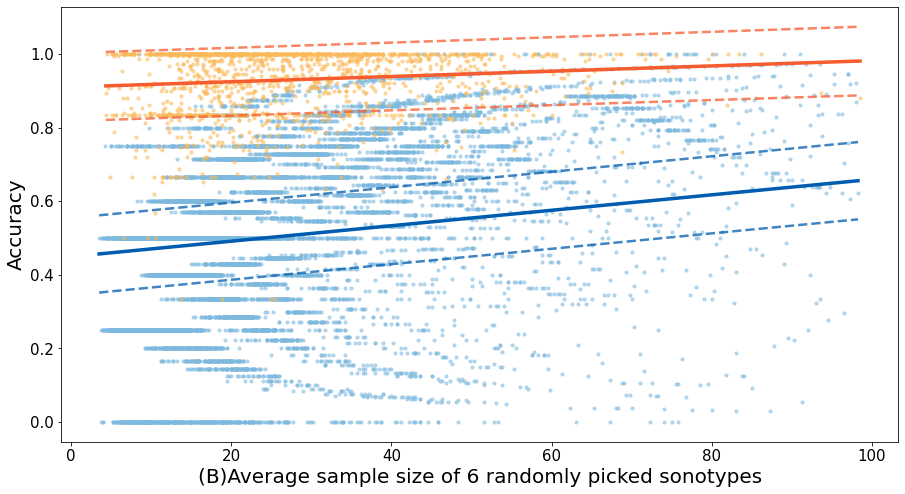

In [87]:
# average
plt.figure(figsize=(15,8))
# plt.title('Classification Accuracy On Randomly Picked 6 Sonotypes After Augmented to 250 Samples Per Sonotype')

plt.rcParams.update({'font.size': 15})
plt.ylabel("Accuracy", fontsize = label_size)

# avg
size_mean_no = np.mean(sizes, axis=1)
size_mean_aug = np.mean(aug_sizes, axis=1)

# use only till the max sample size in the augmentation experiments
used_accs_no = np.array(accs)[np.argwhere(size_mean_no < np.max(size_mean_aug))]
size_mean_no =size_mean_no[np.argwhere(size_mean_no < np.max(size_mean_aug))]
# # if use all
# used_accs_no = accs

# scatter for all results
plt.scatter(size_mean_no, used_accs_no, c = color_no, alpha = alpha, s = dot_size)
plt.scatter(size_mean_aug, aug_accs, c = color_aug, alpha = alpha, s = dot_size)

# trend line or average line
# no aug
sizes_no = np.unique(size_mean_no)
average_no = [np.average(np.array(used_accs_no)[np.argwhere( size_mean_no == x).flatten()]) for x in sizes_no]
# no aug trend line
# z_no = np.polyfit(sizes_no, average_no, 1)
# p_no = np.poly1d(z_no)
# plt.plot(sizes_no,p_no(sizes_no),"r--", c = color_no_line, alpha = alpha_line, linewidth = line_width)

df = pd.DataFrame(
    {"average":average_no,
    "size":sizes_no})
res_no = smf.ols('average ~ size', data=df).fit()
prstd_no, iv_l_no, iv_u_no = wls_prediction_std(res_no, alpha=0.05)
plt.plot(sizes_no,res_no.fittedvalues,"b-", c = color_no_line, alpha = alpha_line, linewidth = line_width)
plt.plot(sizes_no,iv_u_no,"r--", c = color_no_line, alpha = ci_alpha_line, linewidth = ci_line_width)
plt.plot(sizes_no,iv_l_no,"r--", c = color_no_line, alpha = ci_alpha_line, linewidth = ci_line_width)

# average line
# plt.plot(sizes_no, average_no, c = color_no, alpha = alpha_line)

# aug
sizes_aug_unique = np.unique(size_mean_aug)
average_aug = [np.average(np.array(aug_accs)[np.argwhere( size_mean_aug == x).flatten()]) for x in sizes_aug_unique]
# trend line
# z_aug = np.polyfit(sizes_aug_unique, average_aug, 1)
# p_aug = np.poly1d(z_aug)
# plt.plot(sizes_aug_unique,p_aug(sizes_aug_unique),"r--", c = color_aug_line, alpha = alpha_line, linewidth = line_width)

df = pd.DataFrame(
    {"average_aug":average_aug,
    "size_aug":sizes_aug_unique })
res_aug = smf.ols('average_aug ~ size_aug', data=df).fit()
prstd_aug, iv_l_aug, iv_u_aug = wls_prediction_std(res_aug, alpha=0.05) # confidence level 0.05 alpha

plt.plot(sizes_aug_unique,res_aug.fittedvalues,"b-", c = color_aug_line, alpha = alpha_line, linewidth = line_width)
plt.plot(sizes_aug_unique,iv_u_aug,"r--", c = color_aug_line, alpha = ci_alpha_line, linewidth = ci_line_width)
plt.plot(sizes_aug_unique,iv_l_aug,"r--", c = color_aug_line, alpha = ci_alpha_line, linewidth = ci_line_width)

# average line
# plt.plot(sizes_aug_unique, average_aug, c = color_aug, alpha = alpha_line) # average line

# plt.xlim(0,np.max(sizes_aug_unique)) # show to the maximum of sizes for the augmentation experiments
plt.xlabel("(B)Average sample size of 6 randomly picked sonotypes", fontsize = label_size)

strFile = "random_6_avg.png"
if os.path.isfile(strFile):
   os.remove(strFile) 
plt.savefig(strFile,bbox_inches='tight')

In [88]:
df = pd.DataFrame(
    {"average":average_no,
    "size":sizes_no})

results = smf.ols('average ~ size', data=df).fit()
print(results.summary(alpha=0.05))
print(results.params)
print(results.conf_int())
prstd_aug, iv_l_aug, iv_u_aug = wls_prediction_std(res_aug, alpha=0.05) # confidence level 0.05 alpha

df = pd.DataFrame(
    {"average_aug":average_aug,
    "size_aug":sizes_aug_unique })

results = smf.ols('average_aug ~ size_aug', data=df).fit()
prstd_aug, iv_l_aug, iv_u_aug = wls_prediction_std(res_aug, alpha=0.05) # confidence level 0.05 alpha

print(results.summary(alpha=0.05))
# print(dir(results))
print(results.params)
print(results.conf_int())

# print(z_no, z_aug)
# no: coe: 0.0021, p-value: 0.000, CI: 0.002,0.002
# aug: coe:0.0007, p-value: 0.000, CI: 0.000,0.001

                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     412.6
Date:                Tue, 11 May 2021   Prob (F-statistic):           5.73e-62
Time:                        21:31:43   Log-Likelihood:                 559.37
No. Observations:                 368   AIC:                            -1115.
Df Residuals:                     366   BIC:                            -1107.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4493      0.006     77.254      0.0

/Users/sun/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
/Users/sun/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
/Users/sun/.local/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
/Users/sun/.local/lib/python3.7/site-packages/ipykernel_launcher.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
/Users/sun/.local/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarnin

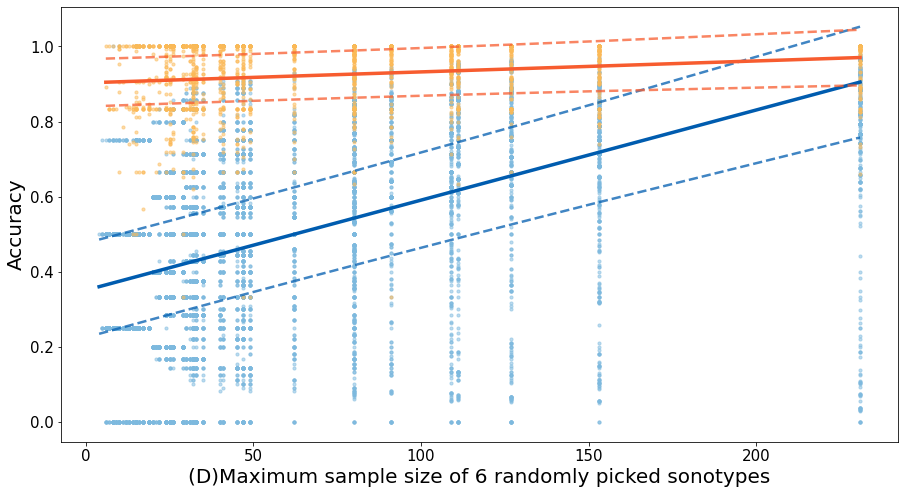

In [126]:
# max
plt.figure(figsize=(15,8))
# plt.title('Classification Accuracy On Randomly Picked 6 Sonotypes After Augmented to 250 Samples Per Sonotype')

plt.rcParams.update({'font.size': 15})
plt.ylabel("Accuracy", fontsize = label_size)

# avg
size_max_no = np.max(sizes, axis=1)
size_max_aug = np.max(aug_sizes, axis=1)

# # use only till the max sample size in the augmentation experiments
# used_accs_no = np.array(accs)[np.argwhere(size_max_no < np.max(size_max_aug))]
# size_max_no =size_max_no[np.argwhere(size_max_no < np.max(size_max_aug))]
# # if use all
used_accs_no = accs

# scatter for all results
plt.scatter(size_max_no, used_accs_no, c = color_no, alpha = alpha,s = dot_size)
plt.scatter(size_max_aug, aug_accs, c = color_aug, alpha = alpha,s = dot_size)

# trend line or average line
# no aug
sizes_no = np.unique(size_max_no)
average_no = [np.average(np.array(used_accs_no)[np.argwhere( size_max_no == x).flatten()]) for x in sizes_no]
# # no aug trend line
# z_no = np.polyfit(sizes_no, average_no, 1)
# p_no = np.poly1d(z_no)
# plt.plot(sizes_no,p_no(sizes_no),"r--", c = color_no_line, alpha = alpha_line, linewidth = line_width)

df = pd.DataFrame(
    {"average":average_no,
    "size":sizes_no})
res_no = smf.ols('average ~ size', data=df).fit()
prstd_no, iv_l_no, iv_u_no = wls_prediction_std(res_no, alpha=0.05)
plt.plot(sizes_no,res_no.fittedvalues,"b-", c = color_no_line, alpha = alpha_line, linewidth = line_width)
plt.plot(sizes_no,iv_u_no,"r--", c = color_no_line, alpha = ci_alpha_line, linewidth = ci_line_width)
plt.plot(sizes_no,iv_l_no,"r--", c = color_no_line, alpha = ci_alpha_line, linewidth = ci_line_width)

# average line
# plt.plot(sizes_no, average_no, c = color_no, alpha = alpha_line)

# aug
sizes_aug_unique = np.unique(size_max_aug)
average_aug = [np.average(np.array(aug_accs)[np.argwhere( size_max_aug == x).flatten()]) for x in sizes_aug_unique]
# trend line
# z_aug = np.polyfit(sizes_aug_unique, average_aug, 1)
# p_aug = np.poly1d(z_aug)
# plt.plot(sizes_aug_unique,p_aug(sizes_aug_unique),"r--",c = color_aug_line, alpha = alpha_line, linewidth = line_width)


df = pd.DataFrame(
    {"average_aug":average_aug,
    "size_aug":sizes_aug_unique })
res_aug = smf.ols('average_aug ~ size_aug', data=df).fit()
prstd_aug, iv_l_aug, iv_u_aug = wls_prediction_std(res_aug, alpha=0.05) # confidence level 0.05 alpha

plt.plot(sizes_aug_unique,res_aug.fittedvalues,"b-", c = color_aug_line, alpha = alpha_line, linewidth = line_width)
plt.plot(sizes_aug_unique,iv_u_aug,"r--", c = color_aug_line, alpha = ci_alpha_line, linewidth = ci_line_width)
plt.plot(sizes_aug_unique,iv_l_aug,"r--", c = color_aug_line, alpha = ci_alpha_line, linewidth = ci_line_width)


# average line
# plt.plot(sizes_aug_unique, average_aug, c = color_aug, alpha = alpha_line) # average line


# plt.xlim(0,np.max(sizes_aug_unique)) # show to the maximum of sizes for the augmentation experiments
plt.xlabel("(D)Maximum sample size of 6 randomly picked sonotypes", fontsize = label_size)

strFile = "random_6_max.png"
if os.path.isfile(strFile):
   os.remove(strFile) 
plt.savefig(strFile,bbox_inches='tight')


In [127]:
df = pd.DataFrame(
    {"average":average_no,
    "size":sizes_no})

results = smf.ols('average ~ size', data=df).fit()
print(results.summary(alpha=0.05))

df = pd.DataFrame(
    {"average_aug":average_aug,
    "size_aug":sizes_aug_unique })

results = smf.ols('average_aug ~ size_aug', data=df).fit()
print(results.summary(alpha=0.05))

# print(z_no, z_aug)
# no: coe: 0.0024, p-value: 0.000, CI: 0.002,0.003
# aug: coe:0.0003, p-value: 0.009, CI: 7.87e-05,0.001

                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     134.8
Date:                Tue, 11 May 2021   Prob (F-statistic):           4.60e-14
Time:                        22:00:42   Log-Likelihood:                 56.311
No. Observations:                  40   AIC:                            -108.6
Df Residuals:                      38   BIC:                            -105.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3508      0.013     27.095      0.0

/Users/sun/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
/Users/sun/.local/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
/Users/sun/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
/Users/sun/.local/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
/Users/sun/.local/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarnin

Text(0.5, 0, '(C)Minimum sample size of 6 randomly picked sonotypes')

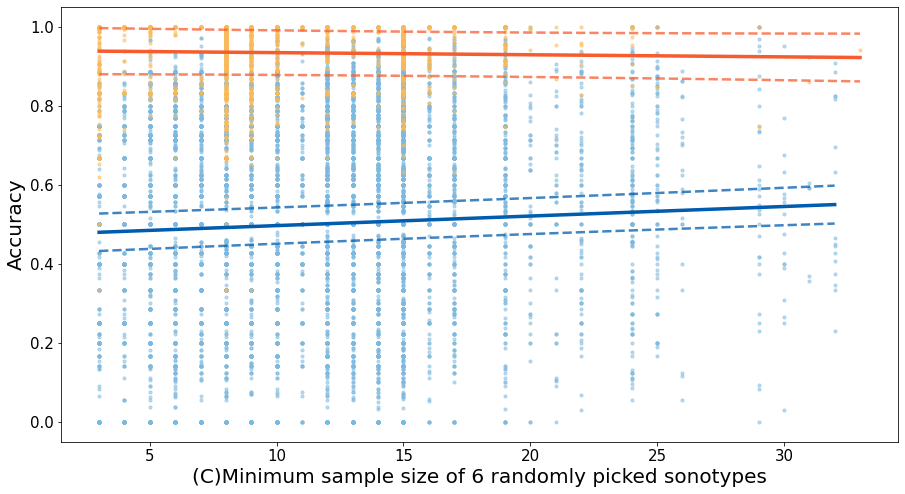

In [123]:
# min
plt.figure(figsize=(15,8))
# plt.title('Classification Accuracy On Randomly Picked 6 Sonotypes After Augmented to 250 Samples Per Sonotype')

plt.rcParams.update({'font.size': 15})
plt.ylabel("Accuracy", fontsize = label_size)

# avg
size_min_no = np.min(sizes, axis=1)
size_min_aug = np.min(aug_sizes, axis=1)

# use only till the max sample size in the augmentation experiments
used_accs_no = np.array(accs)[np.argwhere(size_min_no < np.max(size_min_aug))]
size_min_no = size_min_no[np.argwhere(size_min_no < np.max(size_min_aug))]

# # if use all
# used_accs_no = accs

# scatter for all results
plt.scatter(size_min_no, used_accs_no, c = color_no, alpha = alpha,s = dot_size)
plt.scatter(size_min_aug, aug_accs, c = color_aug, alpha = alpha,s = dot_size)

# trend line or average line
# no aug
sizes_no = np.unique(size_min_no)
average_no = [np.average(np.array(used_accs_no)[np.argwhere( size_min_no == x).flatten()]) for x in sizes_no]
# no aug trend line
# z_no = np.polyfit(sizes_no, average_no, 1)
# p_no = np.poly1d(z_no)
# plt.plot(sizes_no,p_no(sizes_no),"r--", c = color_no_line, alpha = alpha_line, linewidth = line_width)

df = pd.DataFrame(
    {"average":average_no,
    "size":sizes_no})
res_no = smf.ols('average ~ size', data=df).fit()
prstd_no, iv_l_no, iv_u_no = wls_prediction_std(res_no, alpha=0.05)
plt.plot(sizes_no,res_no.fittedvalues,"b-", c = color_no_line, alpha = alpha_line, linewidth = line_width)
plt.plot(sizes_no,iv_u_no,"r--", c = color_no_line, alpha = ci_alpha_line, linewidth = ci_line_width)
plt.plot(sizes_no,iv_l_no,"r--", c = color_no_line, alpha = ci_alpha_line, linewidth = ci_line_width)

# average line
# plt.plot(sizes_no, average_no, c = color_no, alpha = alpha_line)

# aug
sizes_aug_unique = np.unique(size_min_aug)
average_aug = [np.average(np.array(aug_accs)[np.argwhere( size_min_aug == x).flatten()]) for x in sizes_aug_unique]
# trend line
# z_aug = np.polyfit(sizes_aug_unique, average_aug, 1)
# p_aug = np.poly1d(z_aug)
# plt.plot(sizes_aug_unique,p_aug(sizes_aug_unique),"r--", c = color_aug_line, alpha = alpha_line, linewidth = line_width)


df = pd.DataFrame(
    {"average_aug":average_aug,
    "size_aug":sizes_aug_unique })
res_aug = smf.ols('average_aug ~ size_aug', data=df).fit()
prstd_aug, iv_l_aug, iv_u_aug = wls_prediction_std(res_aug, alpha=0.05) # confidence level 0.05 alpha

plt.plot(sizes_aug_unique,res_aug.fittedvalues,"b-", c = color_aug_line, alpha = alpha_line, linewidth = line_width)
plt.plot(sizes_aug_unique,iv_u_aug,"r--", c = color_aug_line, alpha = ci_alpha_line, linewidth = ci_line_width)
plt.plot(sizes_aug_unique,iv_l_aug,"r--", c = color_aug_line, alpha = ci_alpha_line, linewidth = ci_line_width)

# average line
# plt.plot(sizes_aug_unique, average_aug, c = color_aug, alpha = alpha_line) # average line


# plt.xlim(0,np.max(sizes_aug_unique)) # show to the maximum of sizes for the augmentation experiments
plt.xlabel("(C)Minimum sample size of 6 randomly picked sonotypes", fontsize = label_size)

# strFile = "random_6_min.png"
# if os.path.isfile(strFile):
#    os.remove(strFile) 
# plt.savefig(strFile,bbox_inches='tight')


In [361]:
df = pd.DataFrame(
    {"average":average_no,
    "size":sizes_no})

results = smf.ols('average ~ size', data=df).fit()
print(results.summary(alpha=0.05))

df = pd.DataFrame(
    {"average_aug":average_aug,
    "size_aug":sizes_aug_unique })

results = smf.ols('average_aug ~ size_aug', data=df).fit()
print(results.summary(alpha=0.05))

# no: coe: 0.0024, p-value: 0.000, CI: 0.001,0.003
# aug: coe:-0.0005, p-value: 0.407, CI: -0.002,0.001

                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     24.91
Date:                Thu, 06 May 2021   Prob (F-statistic):           4.25e-05
Time:                        16:36:55   Log-Likelihood:                 63.871
No. Observations:                  26   AIC:                            -123.7
Df Residuals:                      24   BIC:                            -121.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4727      0.009     52.303      0.0

# Random 6, Fixed Size

In [77]:
# no aug 
filePath = "classification_6_fixed_no_aug_mar_7.csv"

sizes = []
accs = []
sonotypes = []

with open(filePath) as f:
  contents = f.read()
  lines = contents.split("\n")
  for line in lines:
    if line:
      splited = line.split(", ")
      sonotypes.append([ int(x.split(".")[0]) for x in splited[0].split("; ")])
      sizes.append([ int(x) for x in splited[1].split("; ")])
      accs.append(float(splited[3]))

In [78]:
# aug
filePath = "classification_fixed_size_mar_5.csv"

aug_sizes = []
aug_accs = []
aug_sonotypes = []

with open(filePath) as f:
  contents = f.read()
  lines = contents.split("\n")
  for line in lines:
    if line:
      splited = line.split(", ")
      aug_sonotypes.append([ int(x.split(".")[0]) for x in splited[0].split("; ")])
      aug_sizes.append([ int(x) for x in splited[1].split("; ")])
      aug_accs.append(float(splited[3]))

/Users/sun/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
/Users/sun/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
/Users/sun/.local/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
/Users/sun/.local/lib/python3.7/site-packages/ipykernel_launcher.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
/Users/sun/.local/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarnin

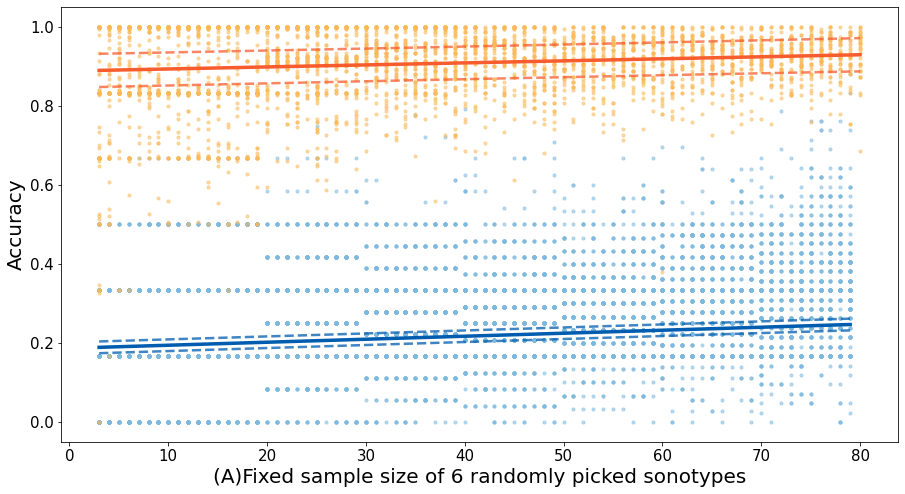

In [81]:
# average
plt.figure(figsize=(15,8))
# plt.title('Classification Accuracy On Randomly Picked 6 Sonotypes After Augmented to 250 Samples Per Sonotype')

plt.rcParams.update({'font.size': 15})
plt.ylabel("Accuracy", fontsize = label_size)

# avg
size_mean_no = np.mean(sizes, axis=1)
size_mean_aug = np.mean(aug_sizes, axis=1)

# use only till the max sample size in the augmentation experiments
used_accs_no = np.array(accs)[np.argwhere(size_mean_no < np.max(size_mean_aug))]
size_mean_no =size_mean_no[np.argwhere(size_mean_no < np.max(size_mean_aug))]
# # if use all
# used_accs_no = accs

# scatter for all results
plt.scatter(size_mean_no, used_accs_no, c = color_no, alpha = alpha,s = dot_size, label="Not Augmented")
plt.scatter(size_mean_aug, aug_accs, c = color_aug, alpha = alpha,s = dot_size, label="Augmented")

# trend line or average line
# no aug
sizes_no = np.unique(size_mean_no)
average_no = [np.average(np.array(used_accs_no)[np.argwhere( size_mean_no == x).flatten()]) for x in sizes_no]
# no aug trend line
# z_no = np.polyfit(sizes_no, average_no, 1)
# p_no = np.poly1d(z_no)
# plt.plot(sizes_no,p_no(sizes_no),"b-", c = color_no_line, alpha = alpha_line, linewidth = line_width)

df = pd.DataFrame(
    {"average":average_no,
    "size":sizes_no})
res_no = smf.ols('average ~ size', data=df).fit()
prstd_no, iv_l_no, iv_u_no = wls_prediction_std(res_no, alpha=0.05)
plt.plot(sizes_no,res_no.fittedvalues,"b-", c = color_no_line, alpha = alpha_line, linewidth = line_width)
plt.plot(sizes_no,iv_u_no,"r--", c = color_no_line, alpha = ci_alpha_line, linewidth = ci_line_width)
plt.plot(sizes_no,iv_l_no,"r--", c = color_no_line, alpha = ci_alpha_line, linewidth = ci_line_width)

# average line
# plt.plot(sizes_no, average_no, c = color_no, alpha = alpha_line)

# aug
sizes_aug_unique = np.unique(size_mean_aug)
average_aug = [np.average(np.array(aug_accs)[np.argwhere( size_mean_aug == x).flatten()]) for x in sizes_aug_unique]
# trend line
# z_aug = np.polyfit(sizes_aug_unique, average_aug, 1)
# p_aug = np.poly1d(z_aug)
# plt.plot(sizes_aug_unique,p_aug(sizes_aug_unique),"b-", c = color_aug_line, alpha = alpha_line, linewidth = line_width)

# res_aug = sm.OLS(average_aug, sizes_aug_unique).fit()
df = pd.DataFrame(
    {"average_aug":average_aug,
    "size_aug":sizes_aug_unique })
res_aug = smf.ols('average_aug ~ size_aug', data=df).fit()
prstd_aug, iv_l_aug, iv_u_aug = wls_prediction_std(res_aug, alpha=0.05) # confidence level 0.05 alpha

plt.plot(sizes_aug_unique,res_aug.fittedvalues,"b-", c = color_aug_line, alpha = alpha_line, linewidth = line_width)
plt.plot(sizes_aug_unique,iv_u_aug,"r--", c = color_aug_line, alpha = ci_alpha_line, linewidth = ci_line_width)
plt.plot(sizes_aug_unique,iv_l_aug,"r--", c = color_aug_line, alpha = ci_alpha_line, linewidth = ci_line_width)

# average line
# plt.plot(sizes_aug_unique, average_aug, c = color_aug, alpha = alpha_line) # average line


# plt.xlim(0,np.max(sizes_aug_unique)) # show to the maximum of sizes for the augmentation experiments
plt.xlabel("(A)Fixed sample size of 6 randomly picked sonotypes", fontsize = label_size)
# plt.legend()

# store
strFile = "random_6_fixed_avg.png"
if os.path.isfile(strFile):
   os.remove(strFile) 
plt.savefig(strFile,bbox_inches='tight')

In [84]:
df = pd.DataFrame(
    {"average":average_no,
    "size":sizes_no})

results = smf.ols('average ~ size', data=df).fit()
print(results.summary())
print(results.params)
print(results.conf_int())

df = pd.DataFrame(
    {"average_aug":average_aug,
    "size_aug":sizes_aug_unique })
results = smf.ols('average_aug ~ size_aug', data=df).fit()
print(results.summary())
print(results.params)
print(results.conf_int())


# no: coe: 0.0008, p-value: 0.000, CI: 0.001,0.001
# aug: coe: 0.0005, p-value: 0.000, CI: 0.000,0.001

                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     413.6
Date:                Tue, 11 May 2021   Prob (F-statistic):           3.00e-32
Time:                        21:30:58   Log-Likelihood:                 270.78
No. Observations:                  77   AIC:                            -537.6
Df Residuals:                      75   BIC:                            -532.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1867      0.002    107.214      0.0

# All four above - plot together

In [18]:
# load data, fixed size
# no aug 
filePath = "classification_6_fixed_no_aug_mar_7.csv"

fix_sizes = []
fix_accs = []
fix_sonotypes = []

with open(filePath) as f:
  contents = f.read()
  lines = contents.split("\n")
  for line in lines:
    if line:
      splited = line.split(", ")
      fix_sonotypes.append([ int(x.split(".")[0]) for x in splited[0].split("; ")])
      fix_sizes.append([ int(x) for x in splited[1].split("; ")])
      fix_accs.append(float(splited[3]))

# aug
filePath = "classification_fixed_size_mar_5.csv"

fix_aug_sizes = []
fix_aug_accs = []
fix_aug_sonotypes = []

with open(filePath) as f:
  contents = f.read()
  lines = contents.split("\n")
  for line in lines:
    if line:
      splited = line.split(", ")
      fix_aug_sonotypes.append([ int(x.split(".")[0]) for x in splited[0].split("; ")])
      fix_aug_sizes.append([ int(x) for x in splited[1].split("; ")])
      fix_aug_accs.append(float(splited[3]))

# for plot
# size
size_fix_no = np.mean(fix_sizes, axis=1)
size_fix_aug = np.mean(fix_aug_sizes, axis=1)
# use only till the max sample size in the augmentation experiments
used_fix_accs_no = np.array(fix_accs)[np.argwhere(size_fix_no < np.max(size_fix_aug))]
size_fix_no =size_fix_no[np.argwhere(size_fix_no < np.max(size_fix_aug))]

# size_fix_no, used_fix_accs_no, size_fix_aug, fix_aug_accs

In [19]:
# load data, random size
# no aug 
filePath = "classification_6_no_fixed_size_no_aug.csv"

sizes = []
accs = []
sonotypes = []

with open(filePath) as f:
  contents = f.read()
  lines = contents.split("\n")
  for line in lines:
    if line:
      splited = line.split(", ")
      sonotypes.append([ int(x.split(".")[0]) for x in splited[0].split("; ")])
      sizes.append([ int(x) for x in splited[1].split("; ")])
      accs.append(float(splited[3]))

# aug
filePath = "classification_random_6_Feb10.csv"

aug_sizes = []
aug_accs = []
aug_sonotypes = []

with open(filePath) as f:
  contents = f.read()
  lines = contents.split("\n")
  for line in lines:
    if line:
      splited = line.split(", ")
      aug_sonotypes.append([ int(x.split(".")[0]) for x in splited[0].split("; ")])
      aug_sizes.append([ int(x) for x in splited[1].split("; ")])
      aug_accs.append(float(splited[3]))

# for plot
# mean
size_mean_no = np.mean(sizes, axis=1)
size_mean_aug = np.mean(aug_sizes, axis=1)
# use only till the max sample size in the augmentation experiments
used_mean_accs_no = np.array(accs)[np.argwhere(size_mean_no < np.max(size_mean_aug))]
size_mean_no =size_mean_no[np.argwhere(size_mean_no < np.max(size_mean_aug))]
# use: size_mean_no, used_mean_accs_no, size_mean_aug, aug_accs

# max
size_max_no = np.max(sizes, axis=1)
size_max_aug = np.max(aug_sizes, axis=1)
# # use only till the max sample size in the augmentation experiments
# used_accs_no = np.array(accs)[np.argwhere(size_max_no < np.max(size_max_aug))]
# size_max_no =size_max_no[np.argwhere(size_max_no < np.max(size_max_aug))]
# # if use all
used_max_accs_no = accs

# use: size_max_no, used_max_accs_no, size_max_aug, aug_accs

# min
size_min_no = np.min(sizes, axis=1)
size_min_aug = np.min(aug_sizes, axis=1)
# use only till the max sample size in the augmentation experiments
used_min_accs_no = np.array(accs)[np.argwhere(size_min_no < np.max(size_min_aug))]
size_min_no = size_min_no[np.argwhere(size_min_no < np.max(size_min_aug))]

# use: size_min_no, used_min_accs_no, size_min_aug, aug_accs

In [20]:
# colors
alpha = 0.5
alpha_line = 1
ci_alpha_line = 0.75
color_no = "#7DB9DE"
color_aug = "#fbb957"
color_no_line = "#005CAF"
color_aug_line = "#F75C2F"
line_width = 3.5
ci_line_width = 2.5
label_size = 35
dot_size = 10

In [21]:
# list used in plot
x_labels = ["Fix","Average","Minimum","Maximum"]
labels = ["A", "B", "C","D"]

# use:size_fix_no, used_fix_accs_no, size_fix_aug, fix_aug_accs
# use: size_mean_no, used_mean_accs_no, size_mean_aug, aug_accs
# use: size_max_no, used_max_accs_no, size_max_aug, aug_accs
# use: size_min_no, used_min_accs_no, size_min_aug, aug_accs

size_no_arr = [size_fix_no,size_mean_no,size_min_no,size_max_no]
size_aug_arr = [size_fix_aug,size_mean_aug,size_min_aug,size_max_aug]
acc_no_arr = [used_fix_accs_no,used_mean_accs_no,used_min_accs_no,used_max_accs_no]
acc_aug_arr = [fix_aug_accs,aug_accs,aug_accs,aug_accs]

In [2]:
# ABCD labels on the left

# global
# fig, axs = plt.subplots(2, 2, figsize=(35,20))


# fig = plt.figure(figsize=(35, 20), constrained_layout=True)
plt.rcParams.update({'font.size': label_size})

fig = plt.figure(figsize=(30, 20))
fig.patch.set_facecolor('white')
gs = fig.add_gridspec(2, 2)
axs = [fig.add_subplot(gs[i]) for i in range(4)]

fig.canvas.draw()
fig.tight_layout(pad=3.0)

for ax, xlabel, size_no, size_aug, acc_no, acc_aug in zip(axs, x_labels, size_no_arr, size_aug_arr, acc_no_arr, acc_aug_arr):
    # axis label
    ax.set_xlabel(xlabel + " sample size of 6 randomly picked sonotypes")
    ax.set_ylabel("Accuracy")

    # scatter
    ax.scatter(size_no, acc_no, c = color_no, alpha = alpha,s = dot_size, label="Without Augmentation")
    ax.scatter(size_aug, acc_aug, c = color_aug, alpha = alpha,s = dot_size, label="With Augmentation")

    # trend line
    # no aug
    sizes_no = np.unique(size_no)
    average_no = [np.average(np.array(acc_no)[np.argwhere( size_no == x).flatten()]) for x in sizes_no]

    # regression
    df = pd.DataFrame(
        {"average":average_no,
        "size":sizes_no})
    res_no = smf.ols('average ~ size', data=df).fit()
    prstd_no, iv_l_no, iv_u_no = wls_prediction_std(res_no, alpha=0.05)

    ax.plot(sizes_no,res_no.fittedvalues,"-", c = color_no_line, alpha = alpha_line, linewidth = line_width)
    ax.plot(sizes_no,iv_u_no,"--", c = color_no_line, alpha = ci_alpha_line, linewidth = ci_line_width)
    ax.plot(sizes_no,iv_l_no,"--", c = color_no_line, alpha = ci_alpha_line, linewidth = ci_line_width)

    # aug
    sizes_aug_unique = np.unique(size_aug)
    average_aug = [np.average(np.array(acc_aug)[np.argwhere( size_aug == x).flatten()]) for x in sizes_aug_unique]

    # regression
    df = pd.DataFrame(
        {"average_aug":average_aug,
        "size_aug":sizes_aug_unique })
    res_aug = smf.ols('average_aug ~ size_aug', data=df).fit()
    prstd_aug, iv_l_aug, iv_u_aug = wls_prediction_std(res_aug, alpha=0.05) # confidence level 0.05 alpha

    ax.plot(sizes_aug_unique,res_aug.fittedvalues,"-", c = color_aug_line, alpha = alpha_line, linewidth = line_width)
    ax.plot(sizes_aug_unique,iv_u_aug,"--", c = color_aug_line, alpha = ci_alpha_line, linewidth = ci_line_width)
    ax.plot(sizes_aug_unique,iv_l_aug,"--", c = color_aug_line, alpha = ci_alpha_line, linewidth = ci_line_width)


# label
axlabels = [fig.text(-1,2, label, fontsize=label_size + 10, fontweight="bold")
            for ax, label in zip(axs, labels)]
trans = fig.transFigure.inverted()
for ax, label in zip(axs, axlabels):
    bbox = ax.get_tightbbox(fig.canvas.get_renderer())
    label.set_position(trans.transform_point([bbox.x0, bbox.y1]))

# legend
lgnd = plt.legend(loc='upper center', bbox_to_anchor=(-0.15, -0.15), fontsize=label_size, ncol = 3)
#change the dot size
lgnd.legendHandles[0]._sizes = [200]
lgnd.legendHandles[1]._sizes = [200]

# store
strFile = "all_plots.png"
if os.path.isfile(strFile):
   os.remove(strFile) 
plt.savefig(strFile,bbox_inches='tight')

# Taxonomic group

In [97]:
# Data for sonotype to group

# all the sound files
labelDir = "./"
labelFiles = ["SA_10Sep2020.txt", "Table_13AB_10Sep2020.txt", "Table_control_10Sep2020.txt"]

freqs = []
files = []
sonotypes = []
groups = []
selection = []

for labelFile in labelFiles:
  print()
  labelFilePath = labelDir + labelFile
  with open(labelFilePath) as file:
    label_reader = csv.reader(file, delimiter='\t')
    for row in label_reader:
      # not use the first row
      if (not row[0].isnumeric()):
        continue

      # get file name
      if labelFile == "SA_10Sep2020.txt":
        fileName = "Spatial analysis/" + row[7].split("Audios_SA\\")[-1].replace("\\","/")
      elif labelFile == "Table_13AB_10Sep2020.txt":
        fileName = "13AB/" + row[7].split("\\")[-1]
        # 3B_20180607_070500_Dawn_Sunrise_Based.wav
        # or 20180908_060000_13A_24H [1.4452 116.9811].wav
      elif labelFile == "Table_control_10Sep2020.txt":
        fileName = "Control sites/" + row[7].split("\\")[-1]
        
      splName = row[7].split("\\")[-1].split("_")

      try:
        sonotypes.append(int(row[11]))
        freqs.append([float(row[5]), float(row[6])])
        files.append(fileName) 
        groups.append(row[12])
        selection.append(int(row[0]))
      except:
        # selection number
        print(filename)
        print(row[0])
        pass

print("dataset size:  %i" % len(times))    
print("filename sample: " + files[0])

# print(len(files))
print(actTimes[len(files)-1])
print(times[len(files)-1])




dataset size:  3783
filename sample: Spatial analysis/4B/20180607_6h_day_weekly/20180607_060500_Dawn_Sunrise__4B___.wav
[26616.9212, 26621.323112212023]
[1176.9212000000007, 1181.3231122120233]


In [98]:
# sonotype to group dictionary
group_dic = dict(zip(sonotypes, groups))
# group label to name dic
labels = ["Invertebrates","Birds","Amphibians","Mammals"]
labels_g = ['i','b','a','m']
# group_label = {'i': "Invertebrates",'b':"Birds",'a':"Amphibians",'m':"Mammals"}

In [103]:
# load data, fixed size, augmented

# aug
filePath = "classification_fixed_size_mar_5.csv"

fix_aug_sizes = []
fix_aug_accs = []
fix_aug_sonotypes = []

with open(filePath) as f:
  contents = f.read()
  lines = contents.split("\n")
  for line in lines:
    if line:
      splited = line.split(", ")
      fix_aug_sonotypes.append([ int(x.split(".")[0]) for x in splited[0].split("; ")])
      fix_aug_sizes.append([ int(x) for x in splited[1].split("; ")])
      fix_aug_accs.append(float(splited[3]))

# accuracy data for each group
group_accs = {}
# fix_aug_sonotypes, fix_aug_accs
for sonos, acc in zip(fix_aug_sonotypes, fix_aug_accs):
    for sono in sonos:
        if group_dic[sono] in group_accs:
            group_accs[group_dic[sono]].append(acc)
        else:
            group_accs[group_dic[sono]] = [acc]

# groups = [group_label[x] for x in group_accs.keys()]
# 2d array 
# group_accs = [group_accs[x] for x in group_accs.keys()]
# fix order
group_accs = [group_accs[x] for x in labels_g]

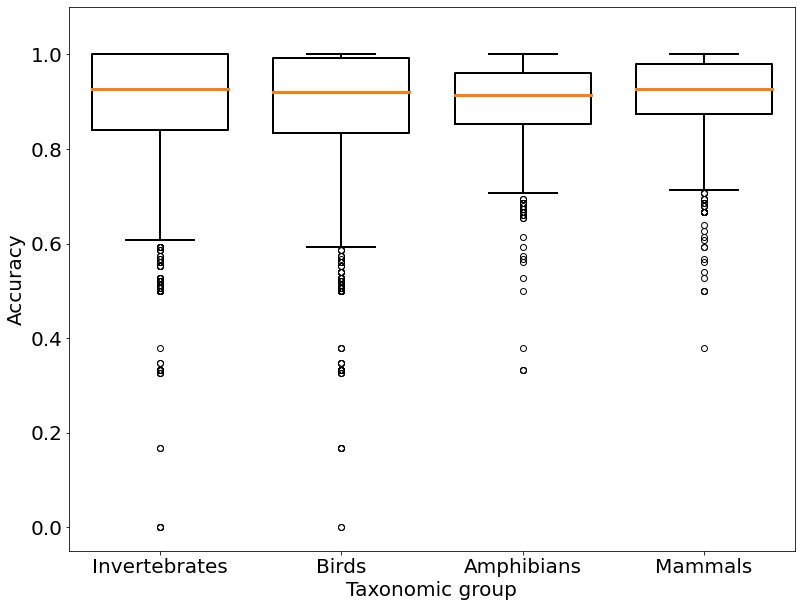

In [100]:
# box plot, the same as above
box_width = 0.75
median_line_width = 3
box_line_width = 2

plt.figure(figsize=(13,10))
plt.rcParams.update({'font.size': 20})
# plt.title('Classification Accuracy On Birds with 49 Samples Per Classes With Augmentation')
plt.xlabel('Taxonomic group', fontsize =20 )
plt.ylabel('Accuracy', fontsize =20 )

plot = plt.boxplot(group_accs, widths=box_width)
for median in plot['medians']:
    median.set(linewidth=median_line_width)
# for flier in plot['fliers']:
#     flier.set(marker='+', color='#e7298a')
for whisker in plot['whiskers']:
    whisker.set(linewidth=box_line_width)
for cap in plot['caps']:
    cap.set(linewidth=box_line_width)
for box in plot['boxes']:
    box.set(linewidth=box_line_width)

plt.xticks(range(1, len(labels) + 1), labels)
plt.ylim([-0.05,1.1])

# plt.show()

strFile = "taxonomic_fix_aug.png"
if os.path.isfile(strFile):
   os.remove(strFile) 
plt.savefig(strFile,bbox_inches='tight')

In [104]:
# fix size no aug 
filePath = "classification_6_fixed_no_aug_mar_7.csv"

fix_sizes = []
fix_accs = []
fix_sonotypes = []

with open(filePath) as f:
  contents = f.read()
  lines = contents.split("\n")
  for line in lines:
    if line:
      splited = line.split(", ")
      fix_sonotypes.append([ int(x.split(".")[0]) for x in splited[0].split("; ")])
      fix_sizes.append([ int(x) for x in splited[1].split("; ")])
      fix_accs.append(float(splited[3]))

# accuracy data for each group
no_group_accs = {}
# fix_aug_sonotypes, fix_aug_accs
for sonos, acc in zip(fix_sonotypes, fix_accs):
    for sono in sonos:
        if group_dic[sono] in no_group_accs:
            no_group_accs[group_dic[sono]].append(acc)
        else:
            no_group_accs[group_dic[sono]] = [acc]

# no_groups = [group_label[x] for x in no_group_accs.keys()]
# # 2d array 
# no_group_accs = [no_group_accs[x] for x in no_group_accs.keys()]
no_group_accs = [no_group_accs[x] for x in labels_g]

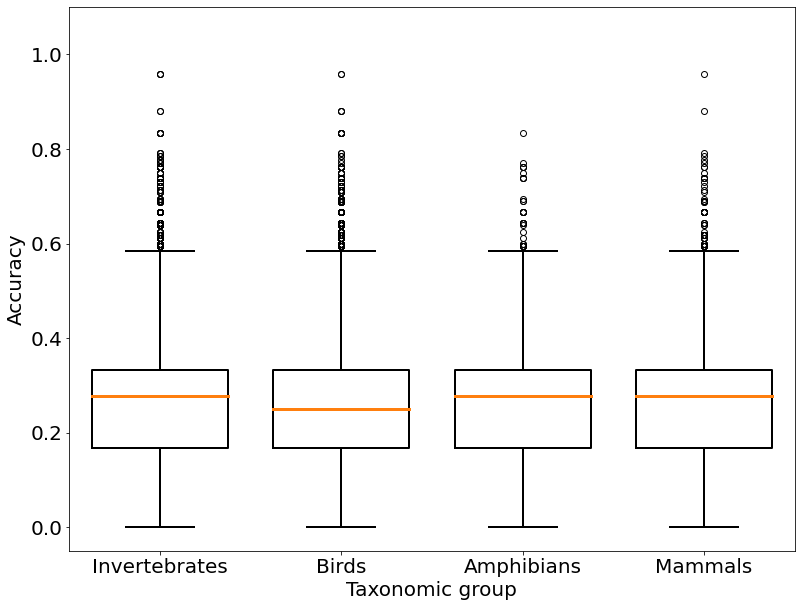

In [106]:
# box plot, the same as above
box_width = 0.75
median_line_width = 3
box_line_width = 2

plt.figure(figsize=(13,10))
plt.rcParams.update({'font.size': 20})
# plt.title('Classification Accuracy On Birds with 49 Samples Per Classes With Augmentation')
plt.xlabel('Taxonomic group', fontsize =20 )
plt.ylabel('Accuracy', fontsize =20 )

plot = plt.boxplot(no_group_accs, widths=box_width)
for median in plot['medians']:
    median.set(linewidth=median_line_width)
# for flier in plot['fliers']:
#     flier.set(marker='+', color='#e7298a')
for whisker in plot['whiskers']:
    whisker.set(linewidth=box_line_width)
for cap in plot['caps']:
    cap.set(linewidth=box_line_width)
for box in plot['boxes']:
    box.set(linewidth=box_line_width)

plt.xticks(range(1, len(labels) + 1), labels)
plt.ylim([-0.05,1.1])

# plt.show()

strFile = "taxonomic_fix_no.png"
if os.path.isfile(strFile):
   os.remove(strFile) 
plt.savefig(strFile,bbox_inches='tight')

## plot together

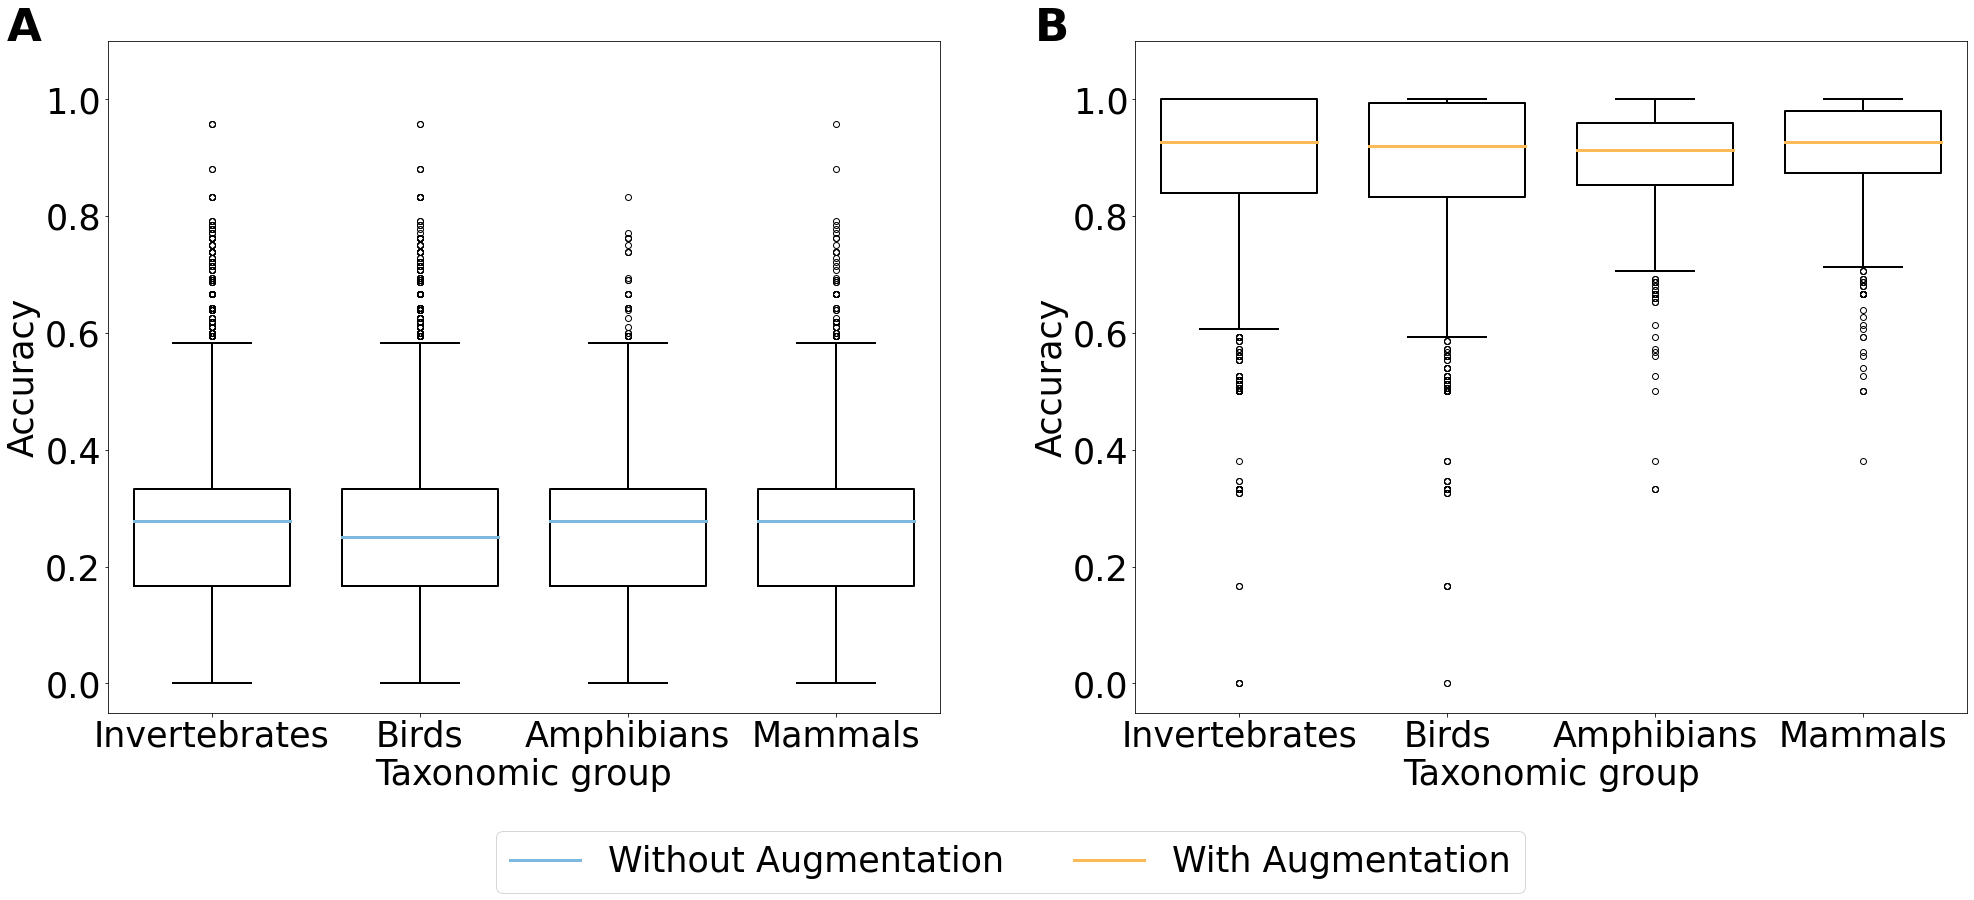

In [158]:
# AB labels on the right
# global
# fig, axs = plt.subplots(2, 2, figsize=(35,20))

box_width = 0.75
median_line_width = 3
box_line_width = 2
label_size = 35
# colors, as above
color_no = "#7DB9DE"
color_aug = "#fbb957"

labels = ["Invertebrates","Birds","Amphibians","Mammals"]

# fig = plt.figure(figsize=(35, 20), constrained_layout=True)
fig = plt.figure(figsize=(30, 13))
fig.patch.set_facecolor('white')
plt.rcParams.update({'font.size': label_size})

gs = fig.add_gridspec(1, 2)
axs = [fig.add_subplot(gs[i]) for i in range(2)]

fig.canvas.draw()
fig.tight_layout(pad=3.0)

# left not augmented
plot = axs[0].boxplot(no_group_accs, widths=box_width)
# plot['medians'][0].set(linewidth=median_line_width,color = color_no,label = "Without Augmentation")
for median in plot['medians']:
    # add label
    median.set(linewidth=median_line_width,color = color_no)
# for flier in plot['fliers']:
#     flier.set(marker='+', color='#e7298a')
for whisker in plot['whiskers']:
    whisker.set(linewidth=box_line_width)
for cap in plot['caps']:
    cap.set(linewidth=box_line_width)
for box in plot['boxes']:
    box.set(linewidth=box_line_width)

# right augmented
plot = axs[1].boxplot(group_accs, widths=box_width)
# plot['medians'][0].set(linewidth=median_line_width,color = color_aug,label = "With Augmentation")
for median in plot['medians']:
    # add label
    median.set(linewidth=median_line_width,color = color_aug)
# for flier in plot['fliers']:
#     flier.set(marker='+', color='#e7298a')
for whisker in plot['whiskers']:
    whisker.set(linewidth=box_line_width)
for cap in plot['caps']:
    cap.set(linewidth=box_line_width)
for box in plot['boxes']:
    box.set(linewidth=box_line_width)

for ax in axs:
    # axis label and ticks
    ax.set_xlabel('Taxonomic group', fontsize =label_size )
    ax.set_ylabel('Accuracy', fontsize =label_size )
    ax.set_xticklabels(labels,fontsize = label_size)
    ax.set_ylim([-0.05,1.1])
# plt.setp(axes, xticks=[y + 1 for y in range(len(all_data))],
#          xticklabels=labels)

# label
axlabels = [fig.text(0,0, label, fontsize=label_size + 10, fontweight="bold")
            for ax, label in zip(axs, ["A","B"])]
trans = fig.transFigure.inverted()
for ax, label in zip(axs, axlabels):
    bbox = ax.get_tightbbox(fig.canvas.get_renderer())
    label.set_position(trans.transform_point([bbox.x0, bbox.y1]))

# legend
# aug_patch = patches.Patch(color=color_aug, label='With Augmentation')
# no_patch = patches.Patch(color=color_no, label='Without Augmentation')
# handles=[no_patch,aug_patch]

lg_lines = [Line2D([0], [0], color=c, linewidth=3) for c in [color_no, color_aug]]
lg_labels = ['Without Augmentation', 'With Augmentation']

lgnd = plt.legend(lg_lines, lg_labels, loc='upper center', fontsize=label_size,bbox_to_anchor=(-0.15, -0.15), ncol = 3)


# store
strFile = "taxonomic_fix_all.png"
if os.path.isfile(strFile):
   os.remove(strFile) 
plt.savefig(strFile,bbox_inches='tight')